Recommender systems are an important class of machine learning algorithms that offer “relevant” suggestions to users. Youtube, Amazon, Netflix, all function on recommendation systems where the system recommends you the next video or product based on your past activity (Content-based Filtering) or based on activities and preferences of other users similar to you (Collaborative Filtering). Likewise, Facebook also uses a recommendation system to suggest Facebook users you may know offline.

Recommendation Systems work based on the similarity between either the content or the users who access the content.

There are several ways to measure the similarity between two items. The recommendation systems use this similarity matrix to recommend the next most similar product to the user.

In this article, we will build a machine learning algorithm that would recommend movies based on a movie the user likes. This Machine Learning model would be based on Cosine Similarity.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
df = pd.read_csv("https://raw.githubusercontent.com/MahnoorJaved98/Movie-Recommendation-System/main/movie_dataset.csv")

In [3]:
df[:2]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [5]:
features = ['keywords', 'cast', 'genres', 'director']
for feature in features:
    df[feature] = df[feature].fillna('')

We will add a new column, combined_features to our existing dataframe (df) and apply the above function to each row (axis = 1). The dataframe will now have an extra column at the end, which will comprise of rows of the combined features.

In [6]:
def combined_features(row):
    return row['keywords']+" "+row['cast']+" "+row['genres']+" "+row['director']
df["combined_features"] = df.apply(combined_features, axis =1)

In [7]:
df["combined_features"][:2]

0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
Name: combined_features, dtype: object

Next, we will extract features from our data.

The sklearn.feature_extraction module can be used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image. We will use CountVectorizer’s fit.tranform to count the number of texts and we will print the transformed matrix count_matrix into an array for better understanding.

In [8]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df["combined_features"])
print("Count Matrix:", count_matrix.toarray())

Count Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
count_matrix.shape

(4803, 14845)

Using the Cosine Similarity
We will use the Cosine Similarity from Sklearn, as the metric to compute the similarity between two movies.

Cosine similarity is a metric used to measure how similar two items are. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The output value ranges from 0–1.

The python Cosine Similarity or cosine kernel, computes similarity as the normalized dot product of input samples X and Y. We will use the sklearn cosine_similarity to find the cos θ for the two vectors in the count matrix.

In [9]:
cosine_sim = cosine_similarity(count_matrix)

In [10]:
cosine_sim

array([[1.        , 0.10540926, 0.12038585, ..., 0.        , 0.        ,
        0.        ],
       [0.10540926, 1.        , 0.0761387 , ..., 0.03651484, 0.        ,
        0.        ],
       [0.12038585, 0.0761387 , 1.        , ..., 0.        , 0.11145564,
        0.        ],
       ...,
       [0.        , 0.03651484, 0.        , ..., 1.        , 0.        ,
        0.04264014],
       [0.        , 0.        , 0.11145564, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04264014, 0.        ,
        1.        ]])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4803 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4803 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [21]:
df_=pd.DataFrame(cosine_sim,columns=df.title,index=df.title)
df_[:2]

title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,On The Downlow,Sanctuary: Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew
title,,,,,,,,,,,,,,,,,,,,,
Avatar,1.000000,0.105409,0.120386,0.037743,0.23094,0.192450,0.0,0.140546,0.082061,0.117851,...,0.0,0.0,0.0,0.070273,0.0,0.075485,0.0,0.000000,0.0,0.0
Pirates of the Caribbean: At World's End,0.105409,1.000000,0.076139,0.035806,0.07303,0.255604,0.0,0.066667,0.116775,0.111803,...,0.0,0.0,0.0,0.000000,0.0,0.035806,0.0,0.036515,0.0,0.0


The cosine_sim matrix is a numpy array with calculated cosine similarity between each movies. As you can see in the image below, the cosine similarity of movie 0 with movie 0 is 1; they are 100% similar (as should be).

Similarly the cosine similarity between movie 0 and movie 1 is 0.105409 (the same score between movie 1 and movie 0 — order does not matter).

Movies 0 and 4 are more similar to each other (with a similarity score of 0.23094) than movies 0 and 3 (score = 0.0377426).

The diagonal with 1s suggests what the case is, each movie ‘x’ is 100% similar to itself!

Content User likes

The next step is to take as input a movie that the user likes in the movie_user_likes variable.

Since we are building a content based filtering system, we need to know the users’ likes in order to predict a similar item.

In [22]:
movie_user_likes = "Dead Poets Society"
def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]
movie_index = get_index_from_title(movie_user_likes)

In [23]:
movie_index

2453

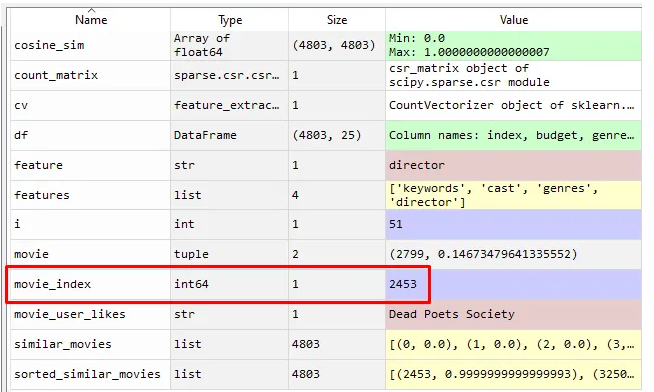

Generating the Similar Movies Matrix

Next we will generate a list of similar movies. We will use the movie_index of the movie we have given as input movie_user_likes. The enumerate() method will add a counter to the iterable list cosine_sim and return it in a form of a list similar_movies with the similarity score of each index.

In [24]:
similar_movies = list(enumerate(cosine_sim[movie_index]))

In [26]:
similar_movies[:10]

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.04499212706658475),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.04188539082916955),
 (8, 0.0),
 (9, 0.0)]

Sorting the Similar Movies List in Descending Order
Next step is to sort the movies in the list similar_movies. We have used the parameter reverse=True since we want the list in the descending order, with the most similar item at the top.

In [27]:
sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)

The sorted_similar_movies will be a list of all the movies sorted in descending order with respect to their similarity score with the input movie movie_user_likes.

As can be seen in the image below, the most similar one with a similarity score of 0.9999999999999993 is at the top most, with its index number 2453 (the movie is ‘Dead Poets Society’ which we gave as input, makes sense, right?).

In [29]:
sorted_similar_movies[:10]

[(2453, 0.9999999999999993),
 (3250, 0.21677749238102995),
 (905, 0.21052631578947364),
 (2975, 0.2051956704170308),
 (825, 0.19564639521780736),
 (1507, 0.19134594929397594),
 (4273, 0.1908854288927333),
 (1774, 0.1873171623163388),
 (4488, 0.18394180184548975),
 (3526, 0.1835325870964494)]

Printing the Similar Movies
Now, here comes the last part of the project, which is to print the names of the movies similar to the one we have given as input to the system through the movie_user_likes variable.

As seen in the sorted_similar_movies list, the movies are sorted by their index number. Printing the index number will be of no use to us, so we will define a simple function that takes the index number and covert it into the movie title as in the dataframe.

Index Number → Movie Title

Next we will call this function inside the for loop to print the first ‘x’ number of movies from the sorted_similar_movies.

In our case, we will print the 15 most similar movies from a pool of 4802 movies.

In [30]:
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]
i=0
for movie in sorted_similar_movies:
    print(get_title_from_index(movie[0]))
    i=i+1
    if i>15:
        break

Dead Poets Society
Much Ado About Nothing
Patch Adams
Good Will Hunting
Flightplan
Alive
The Basket
What Just Happened
Adulterers
The Sting
The Tree of Life
The Greatest Game Ever Played
Light It Up
The Wood
The Naked Ape
Jakob the Liar


https://towardsdatascience.com/using-cosine-similarity-to-build-a-movie-recommendation-system-ae7f20842599